In [1]:
#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
# Load dataset
df = pd.read_csv("house_prediction_cleaned.csv")


In [7]:
# Using top correlated features from Week 4
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'LotArea']
target = 'SalePrice'

X = df[features]
y = df[target]

In [8]:
#2️⃣ Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}\n")

Training samples: 244
Testing samples: 62



In [13]:
# -------------------------------
# 3️⃣ Train Linear Regression Model (handle missing values)
# -------------------------------
from sklearn.impute import SimpleImputer

# Drop training rows with missing target values
train_idx = y_train.dropna().index
X_train_clean = X_train.loc[train_idx]
y_train_clean = y_train.loc[train_idx]

# Impute missing feature values using median (fit on training data)
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train_clean)

X_train_imputed = pd.DataFrame(
	imputer.transform(X_train_clean),
	index=X_train_clean.index,
	columns=X_train_clean.columns
)

# Impute test features using the same imputer
X_test_imputed = pd.DataFrame(
	imputer.transform(X_test),
	index=X_test.index,
	columns=X_test.columns
)

# Drop test rows with missing target values and align X_test/y_test
test_idx = y_test.dropna().index
X_test = X_test_imputed.loc[test_idx]
y_test = y_test.loc[test_idx]

# Train the model on cleaned / imputed training data
model = LinearRegression()
model.fit(X_train_imputed, y_train_clean)

LinearRegression()

In [15]:
## 4️⃣ Make Predictions
# -------------------------------
y_pred = model.predict(X_test)



In [16]:
# 5️⃣ Evaluate Model Performance
# -------------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [17]:
print("=== Model Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}\n")

=== Model Evaluation ===
Mean Absolute Error (MAE): 16950.77
Root Mean Squared Error (RMSE): 21477.46



In [18]:
# 6️⃣ Compare Actual vs Predicted
# -------------------------------
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
}).head(10)

print("=== Sample Predictions ===")
print(comparison, "\n")

=== Sample Predictions ===
     Actual      Predicted
0  181500.0  230314.014984
1  118000.0  146243.315689
2  370000.0  362134.694651
3  190000.0  197740.516025
4  245000.0  269987.971055
5  275000.0  288517.698319
6  185000.0  203718.189182
7  265000.0  244397.176772
8  143000.0  150945.817462
9  210000.0  213805.396493 



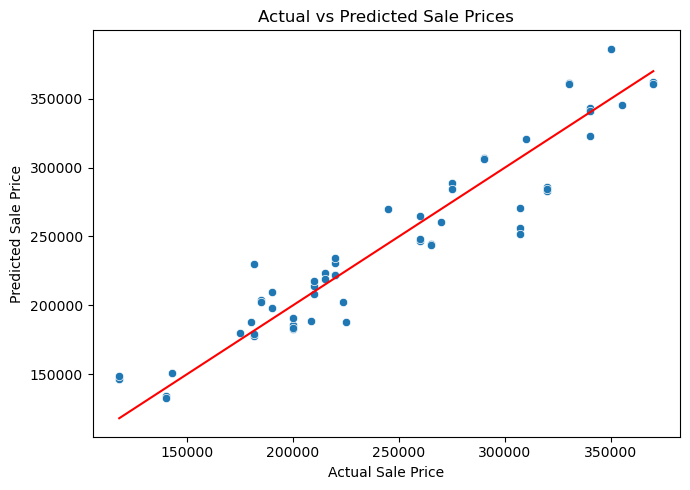

In [23]:
import seaborn as sns

# 7️⃣ Visualize Predictions
# -------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.tight_layout()
plt.show()


In [24]:
# 8️⃣ Feature Importance (Coefficients)
# -------------------------------
importance = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("=== Feature Importance (Model Coefficients) ===")
print(importance, "\n")

=== Feature Importance (Model Coefficients) ===
       Feature  Coefficient
0  OverallQual  2575.189755
4    YearBuilt   544.100815
2   GarageCars   500.299828
3  TotalBsmtSF   102.857258
1    GrLivArea    81.096822
5      LotArea     1.342846 

